In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mplhep
plt.style.use(mplhep.style.CMS)

In [143]:
import scipy
import scipy.sparse

In [144]:
dm = scipy.sparse.load_npz("../dist_0.npz")

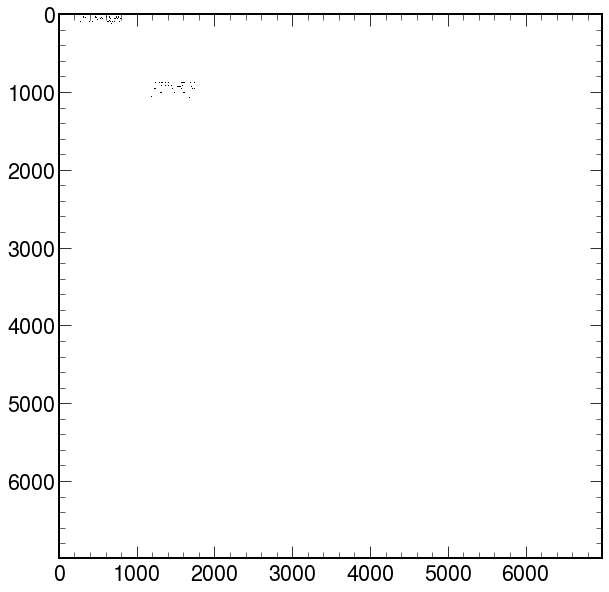

In [149]:
plt.imshow(dm.todense()>0.0, cmap="Greys")

In [21]:
gen = pd.read_csv("../gen_0.csv", index_col=0)
reco = pd.read_csv("../reco_0.csv", index_col=0)

fi0 = np.load("../ev_0.npz")
rg = fi0["reco_gen"]
rc = fi0["reco_cand"]

In [30]:
gen["num_matched"] = (rg > 0.0).sum(axis=0)
reco["num_matched"] = (rg > 0.0).sum(axis=1)

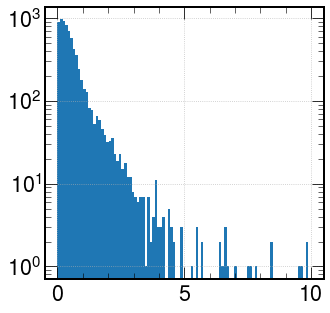

In [33]:
plt.figure(figsize=(5,5))
gen["pt"].hist(bins=np.linspace(0,10,100))
plt.yscale("log")

In [181]:
Xs = []
ys = []
ycs = []
for i in range(10):
    fi = np.load("../ev_{}.npz".format(i))
    X = fi["X"]
    y = fi["ygen"]
    yc = fi["ycand"]
    
    Xs += [X]
    ys += [y]
    ycs += [yc]

In [35]:
# plt.hist(rg[rg>0], bins=np.linspace(0,200,100));
# plt.yscale("log")

In [36]:
for igen in range(20):
    idx_max = np.argmax(rg[:, igen])
    inds_max = np.argsort(rg[:, igen])[::-1][:3]
    rgs = rg[inds_max, igen]
    print(igen, inds_max, rgs)

0 [  26 2333 2322] [0.19213755 0.         0.        ]
1 [63 62 89] [0.12693141 0.12693141 0.12693141]
2 [2603   88   53] [1.72404265 0.5755856  0.35545847]
3 [50 44 51] [76.49506378 49.486763   43.41188812]
4 [34 53 27] [13.13729191 13.13729191 13.13729191]
5 [61 56 44] [4.30009317 4.30009317 4.30009317]
6 [67 35 38] [22.20698929 22.20698929 22.20698929]
7 [62 53 52] [1.75534689 1.75534689 1.75534689]
8 [36 62 52] [0.03270804 0.02051267 0.02051267]
9 [30 96 54] [0.18189584 0.01424204 0.01424204]
10 [32 36 33] [0.22901426 0.22901426 0.22901426]
11 [29 63 28] [40.87813187 36.6157608  36.4850769 ]
12 [30 55 64] [2.03977633 1.91614044 1.90027177]
13 [36 32 53] [6.82721663 6.65399647 6.65399647]
14 [61 38 81] [13.94748402 13.94748402 13.19028473]
15 [33 39 27] [5.5394187  5.44383192 5.44383192]
16 [30 34 53] [7.64618063 7.64618063 7.64618063]
17 [64 96 40] [7.50823116 6.66697121 6.66697121]
18 [63 54 64] [3.44049597 3.44049597 3.44049597]
19 [33 34 28] [0.08863248 0.04662066 0.02863347]


Text(0, 0.5, 'recoparticle index')

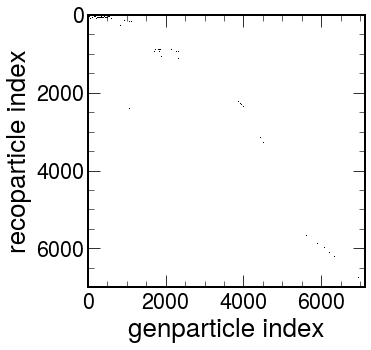

In [40]:
plt.figure(figsize=(5, 5))
plt.imshow(rg>0.0, cmap="Greys", interpolation='None')
plt.xlabel("genparticle index")
plt.ylabel("recoparticle index")

Text(0, 0.5, 'fraction of total')

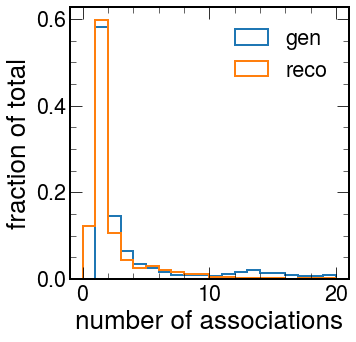

In [41]:
plt.figure(figsize=(5, 5))

rgs = rg>0.0
plt.hist(rgs.sum(axis=0), bins=np.linspace(0, 20, 21), density=1.0, histtype="step", lw=2, label="gen");
plt.hist(rgs.sum(axis=1), bins=np.linspace(0, 20, 21), density=1.0, histtype="step", lw=2, label="reco");
plt.legend()
#plt.yscale("log")
plt.xlabel("number of associations")
plt.ylabel("fraction of total")

Text(0, 0.5, 'recoparticle index')

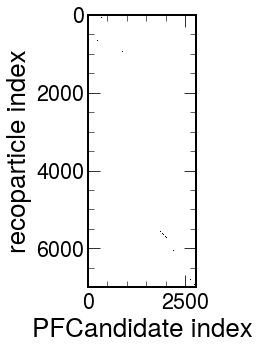

In [43]:
plt.figure(figsize=(5, 5))
plt.imshow(rc>0.0, cmap="Greys", interpolation='None')
plt.xlabel("PFCandidate index")
plt.ylabel("recoparticle index")

Text(0, 0.5, 'fraction of total')

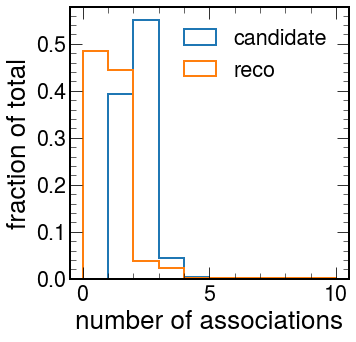

In [44]:
plt.figure(figsize=(5, 5))
rcs = rc>0.0
plt.hist(rcs.sum(axis=0), bins=np.linspace(0, 10, 11), density=1.0, histtype="step", lw=2, label="candidate");
plt.hist(rcs.sum(axis=1), bins=np.linspace(0, 10, 11), density=1.0, histtype="step", lw=2, label="reco");
plt.legend()
#plt.yscale("log")
plt.xlabel("number of associations")
plt.ylabel("fraction of total")

In [106]:
from collections import Counter

Text(0, 0.5, 'GenParticle PDGID')

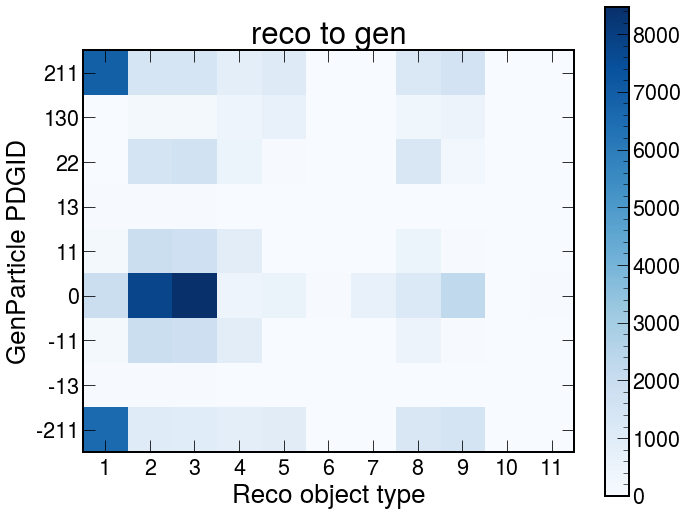

Text(0.5, 0, 'Reco object type')

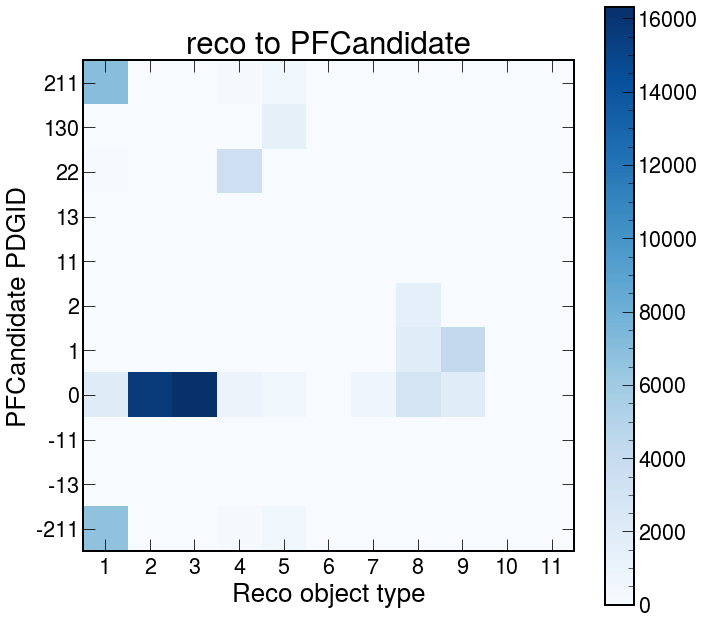

In [110]:
plot_id_pairs(yc[:, 0], X[:, 0])
plt.title("reco to PFCandidate", y=1.0)
plt.ylabel("PFCandidate PDGID")
plt.xlabel("Reco object type")

Text(0, 0.5, 'PFCandidate PDGID')

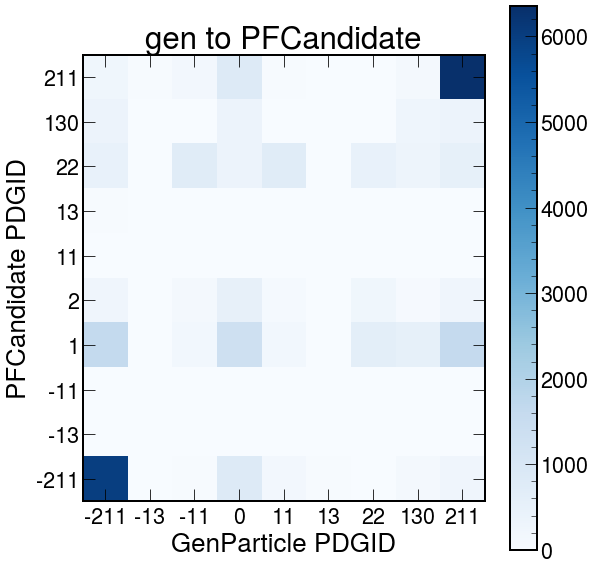

In [111]:
plot_id_pairs(yc[m2, 0], y[m2, 0])
plt.title("gen to PFCandidate", y=1.0)
plt.xlabel("GenParticle PDGID")
plt.ylabel("PFCandidate PDGID")

In [112]:
has_cand = (yc[:, 0] != 0)
has_gen = (y[:, 0] != 0)

is_track = X[:, 0] == 1

In [113]:
X.shape

(68906, 6)

In [114]:
Counter(X[has_gen, 0])

Counter({5.0: 2715,
         4.0: 4332,
         3.0: 7836,
         2.0: 7926,
         1.0: 13876,
         11.0: 7,
         10.0: 38,
         9.0: 3902,
         8.0: 5036})

In [115]:
Counter(X[~has_gen, 0])

Counter({1.0: 1886,
         11.0: 65,
         7.0: 648,
         6.0: 53,
         5.0: 555,
         4.0: 398,
         3.0: 8478,
         2.0: 7752,
         8.0: 1182,
         9.0: 2219,
         10.0: 2})

In [ ]:
X[is_track].shape

In [ ]:
X[is_track & has_cand & has_gen].shape

In [ ]:
X[is_track & has_cand & ~has_gen].shape

In [ ]:
X[is_track & ~has_cand].shape

In [ ]:
yc[has_cand & has_gen, 0].shape

In [ ]:
yc[has_cand & ~has_gen, 0].shape

In [119]:
pids = np.unique(yc[has_cand, 0])
c1 = Counter(yc[has_cand&has_gen, 0])
c2 = Counter(yc[has_cand&~has_gen, 0])

In [133]:
yvals = [c1[p]/np.sum(has_cand) for p in pids]
yvals2 = [c2[p]/np.sum(has_cand) for p in pids]

(0, 0.4)

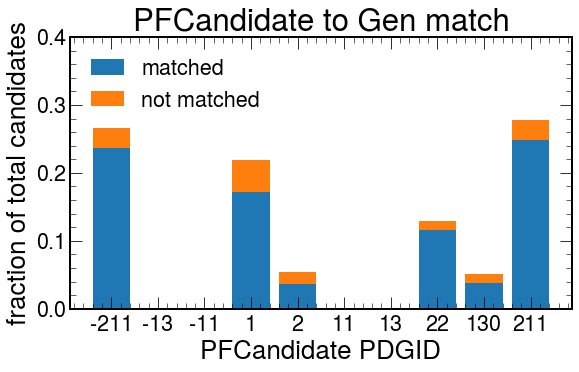

In [136]:
plt.figure(figsize=(9,5))
xs = np.arange(len(pids))
plt.bar(xs, yvals, label="matched")
plt.bar(xs, yvals2, bottom=yvals, label="not matched")
plt.xticks(xs, [int(x) for x in pids]);
plt.ylabel("fraction of total candidates")
plt.xlabel("PFCandidate PDGID")
plt.title("PFCandidate to Gen match")
plt.legend()
plt.ylim(0,0.4)

In [139]:
df2 = pd.DataFrame(np.hstack([X, y, yc]))

In [142]:
df2[df2[0]==4]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
118,4.0,0.0,1.388694,-2.816768,0.455373,-1.0,211.0,2.866624,1.859673,1.230605,9.473989,1.0,0.0,0.000000,0.000000,0.000000,0.000000
119,4.0,0.0,0.197241,1.493732,0.720069,-1.0,-211.0,0.868959,0.148651,0.394683,1.285400,1.0,0.0,0.000000,0.000000,0.000000,0.000000
120,4.0,0.0,1.218195,2.018385,0.368082,-1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
121,4.0,0.0,1.406005,0.420109,0.952518,-1.0,-211.0,2.209955,1.406136,0.077576,4.781339,1.0,0.0,0.000000,0.000000,0.000000,0.000000
122,4.0,0.0,0.495671,2.889674,0.740974,-1.0,211.0,2.647576,0.484425,-3.082434,3.005176,1.0,22.0,0.803485,0.476550,2.890765,0.896461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67602,4.0,0.0,-1.092321,0.836067,2.849396,-1.0,-11.0,1.921335,-1.116079,0.837071,3.247462,1.0,22.0,2.059545,-1.085118,0.835704,3.395830
67603,4.0,0.0,0.470643,1.109815,0.397092,-1.0,11.0,0.395444,0.509769,1.111464,0.447948,1.0,22.0,0.439209,0.482251,1.109615,0.491278
67604,4.0,0.0,1.268852,-1.700446,0.397781,-1.0,211.0,1.052231,0.301374,-1.260583,1.446094,1.0,22.0,0.255132,1.274915,-1.700462,0.492132
67605,4.0,0.0,-0.556370,-2.941744,0.393004,-1.0,-11.0,0.427876,-0.585866,-2.948744,0.503433,1.0,22.0,0.421917,-0.545321,-2.941125,0.486221


In [162]:
randinds = np.random.permutation(range(len(df2)))[:100]
df3 = df2[[0, 4, 6, 12]]

In [163]:
df3.loc[randinds]

,0,4,6,12
18088,1.0,0.844655,-211.0,-211.0
18546,4.0,0.883180,211.0,0.0
66720,3.0,0.000140,0.0,0.0
48033,8.0,23.093889,-211.0,0.0
30835,1.0,6.068276,211.0,211.0
...,...,...,...,...
14838,3.0,0.000138,-11.0,0.0
40974,9.0,75.688889,211.0,0.0
58634,3.0,0.000544,0.0,0.0
7267,5.0,7.085177,-13.0,-211.0


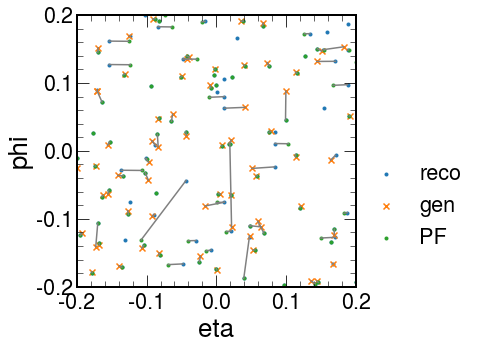

In [196]:
plt.figure(figsize=(5,5))
ax = plt.axes()

bigmask = (np.abs(X[:, 2]) < 0.2) & (np.abs(X[:, 3]) < 0.2)
plt.scatter(X[bigmask, 2], X[bigmask, 3], marker=".", label="reco")
plt.scatter(y[bigmask & m, 2], y[bigmask & m, 3], marker="x", label="gen")
plt.scatter(yc[bigmask & m2, 2], yc[bigmask & m2, 3], marker=".", label="PF")

for idx in np.nonzero(bigmask)[0]:
    _x1, _y1 = X[idx, 2], X[idx, 3]
    _x2, _y2 = y[idx, 2], y[idx, 3]
    _x3, _y3 = yc[idx, 2], yc[idx, 3]
    if _x2 != 0 and abs(_x2) < 0.2 and abs(_y2) < 0.2:
        plt.plot([_x1, _x2], [_y1, _y2], color="gray")
    if _x3 != 0 and abs(_x3) < 0.2 and abs(_y3) < 0.2:
        plt.plot([_x1, _x3], [_y1, _y3], color="gray")
        
plt.xlim(-0.2, 0.2)
plt.ylim(-0.2, 0.2)
plt.xlabel("eta")
plt.ylabel("phi")
plt.legend(loc=(1.01,0.1))

In [173]:
plt.legend?